# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [37]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [38]:
# Load the dataset
df = pd.read_csv("Wholesale_Data.csv")

# Display the first few rows
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [39]:
# Drop non-numerical features for clustering
df_features = df.drop(columns=["Channel", "Region"])

# Check for missing values
df_features.isnull().sum()


Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [40]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_features.columns)


Missing Values: None — the dataset is clean.
Normalization Applied: StandardScaler (Z-score normalization)

Each feature is now:

Mean = 0

Standard Deviation = 1


In [41]:
df_features.describe()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


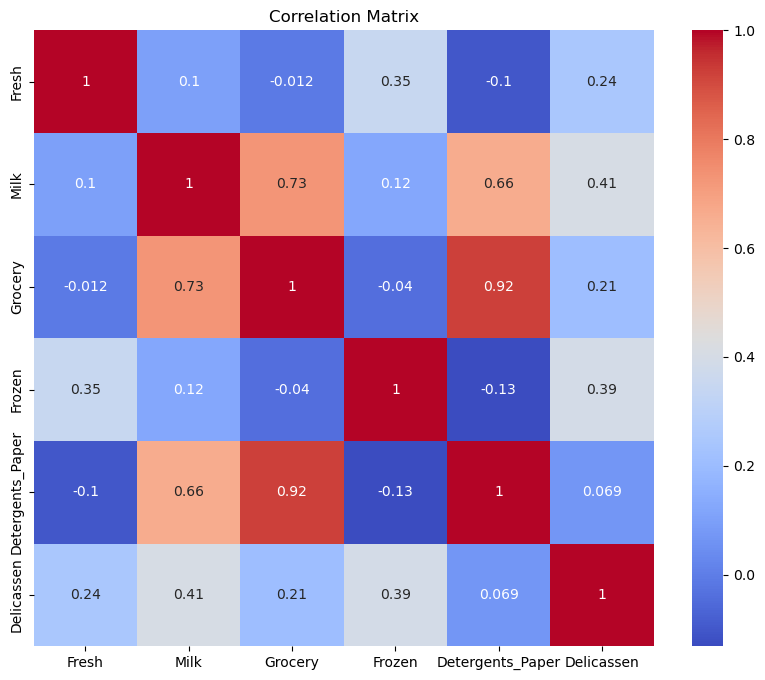

In [42]:
# Correlation matrix
corr_matrix = df_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



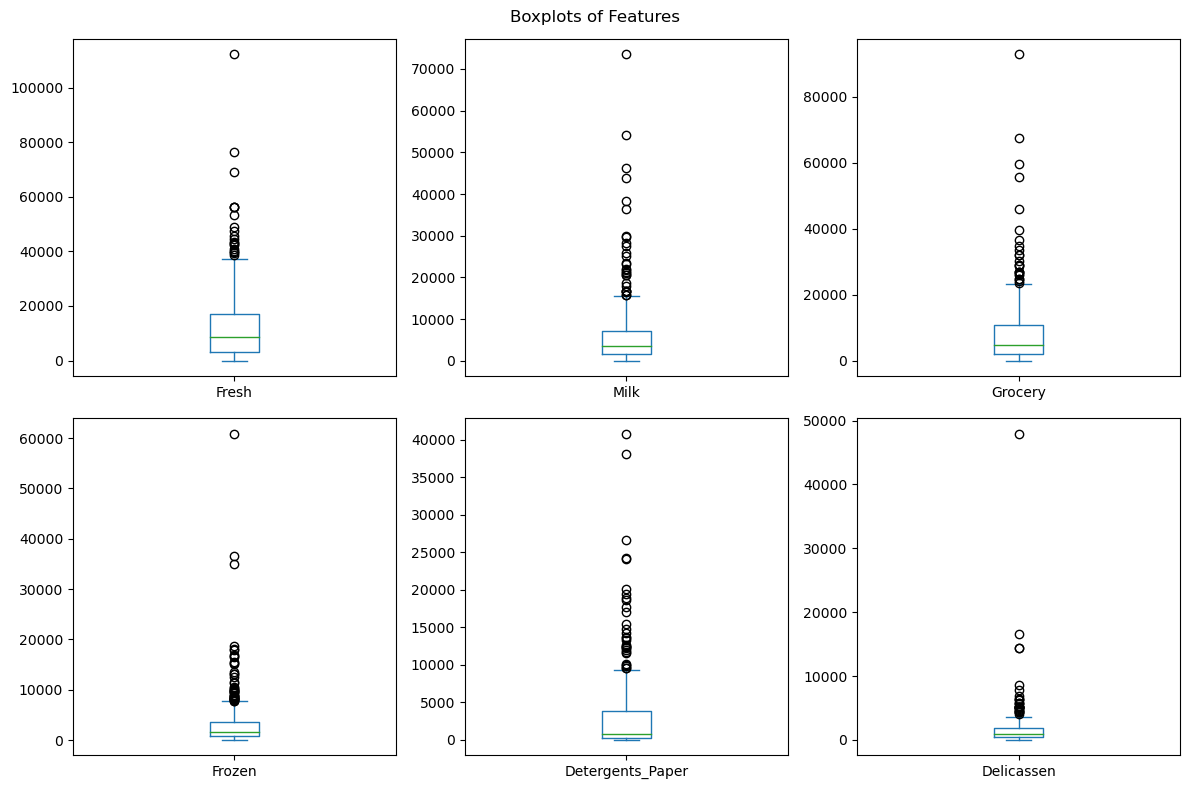

In [43]:
df_features.plot(kind='box', subplots=True, layout=(2, 3), figsize=(12, 8), title="Boxplots of Features")
plt.tight_layout()
plt.show()


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

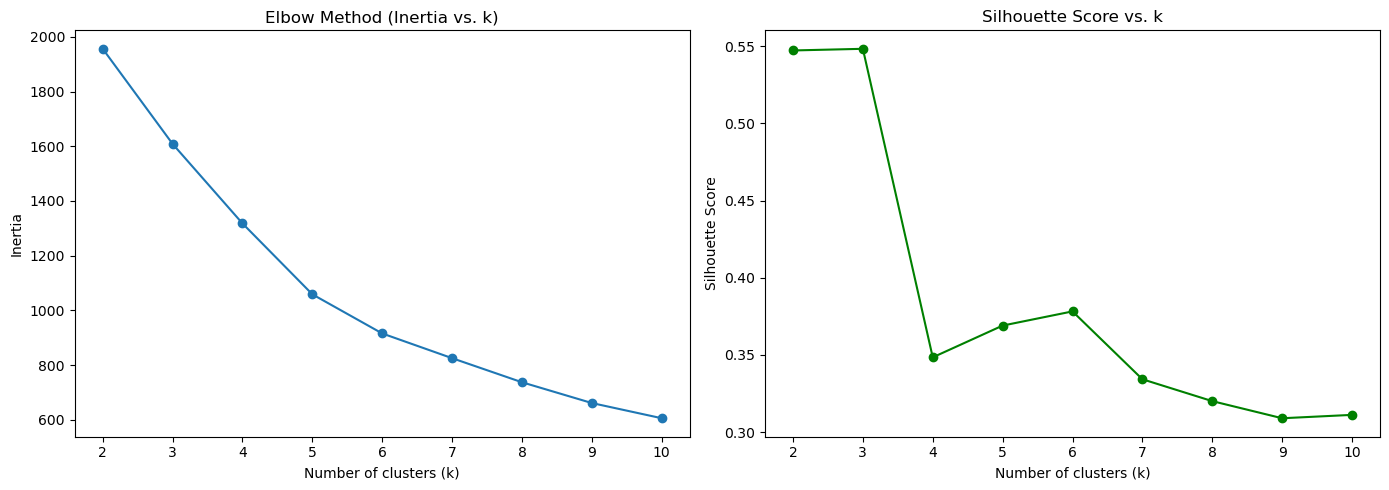

In [44]:
#Determine Optimal Number of Clusters

inertia = []
silhouette = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_scaled, labels))

# Plot Inertia (Elbow Method)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method (Inertia vs. k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette, marker='o', color='green')
plt.title('Silhouette Score vs. k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()



In [45]:
# Apply KMeans with the chosen number of clusters (e.g., k=3)
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans_final.fit_predict(df_scaled)


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [46]:
# Compute the linkage matrix using Ward's method
linked = linkage(df_scaled.drop(columns='Cluster'), method='ward')


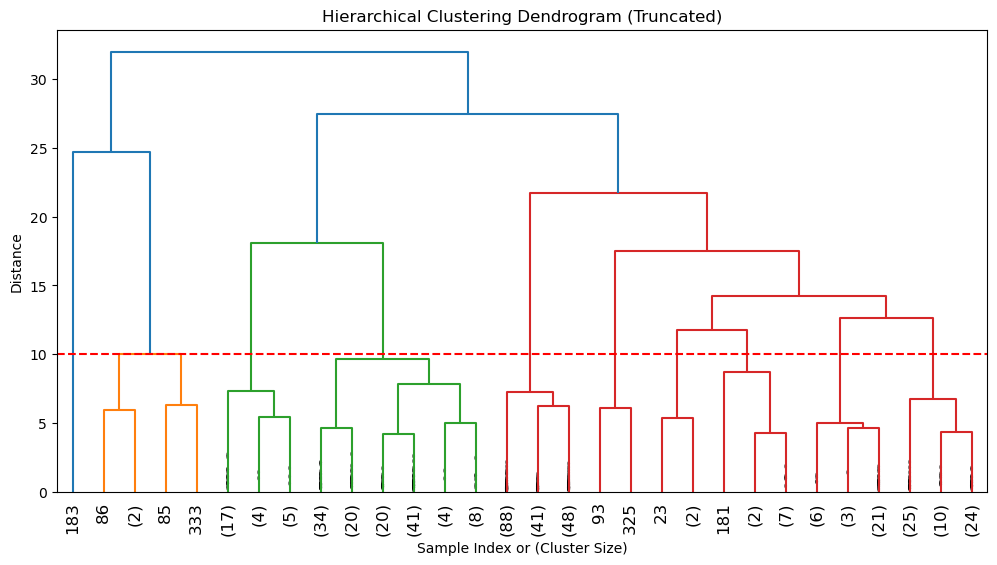

In [47]:
# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.axhline(y=10, color='r', linestyle='--')
plt.show()


In [48]:
# Assign cluster labels based on the dendrogram
num_clusters = 3
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')
df_scaled['Hierarchical_Cluster'] = cluster_labels


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [49]:
# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled.drop(columns=['Cluster', 'Hierarchical_Cluster']))

# Create a DataFrame with PCA components
df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Add the cluster labels from KMeans
df_pca['Cluster'] = df_scaled['Cluster']




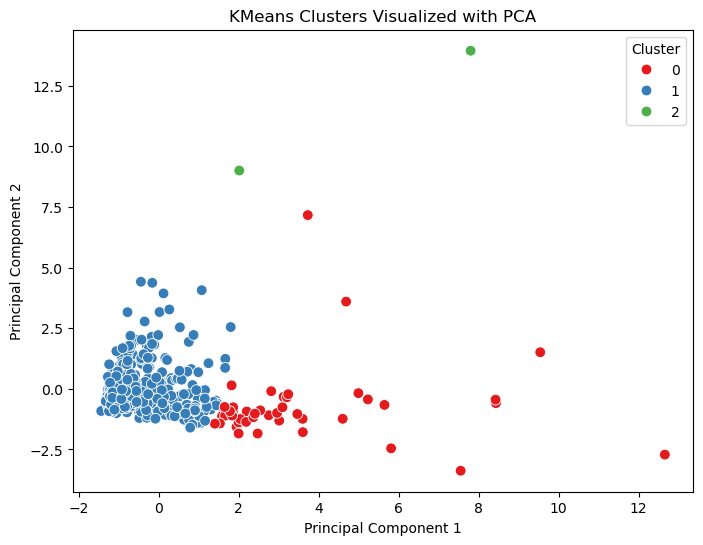

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=60)
plt.title('KMeans Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.


- Data Preprocessing: Successfully normalized the dataset, ensuring all features contribute equally to the clustering algorithms.

- KMeans Clustering: Optimal number of clusters determined to be 3 using Elbow and Silhouette methods, revealing distinct customer segments.

- Hierarchical Clustering: Dendrogram analysis supported the presence of 3 clusters, consistent with KMeans results.

- PCA Visualization: Reduced data to 2 principal components, capturing the majority of variance and facilitating clear visualization of cluster separations.

